Mann-Whitney U test: U-statistic = 159.0, p-value = 0.9367606394048137
Wilcoxon Signed-Rank test: W-statistic = 82.0, p-value = 0.8985748291015625
Spearman Correlation: rho = 0.7508277027088005, p-value = 0.00032987737912665836
                   sum_sq    df             F    PR(>F)
Condition        0.000003   1.0  6.484061e-08  0.999798
GA             372.713035   1.0  8.700098e+00  0.005905
Condition:GA    17.172043   1.0  4.008404e-01  0.531155
Residual      1370.883082  32.0           NaN       NaN


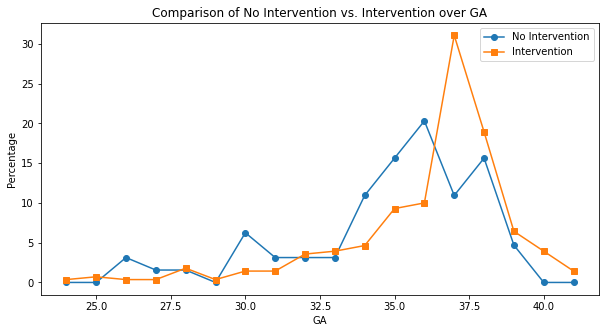

In [68]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Data
df = pd.DataFrame([[24.  ,  0.  ,  0.36],
       [25.  ,  0.  ,  0.71],
       [26.  ,  3.13,  0.36],
       [27.  ,  1.56,  0.36],
       [28.  ,  1.56,  1.79],
       [29.  ,  0.  ,  0.36],
       [30.  ,  6.25,  1.43],
       [31.  ,  3.13,  1.43],
       [32.  ,  3.13,  3.57],
       [33.  ,  3.13,  3.93],
       [34.  , 10.94,  4.64],
       [35.  , 15.63,  9.29],
       [36.  , 20.31, 10.  ],
       [37.  , 10.94, 31.07],
       [38.  , 15.63, 18.93],
       [39.  ,  4.69,  6.43],
       [40.  ,  0.  ,  3.93],
       [41.  ,  0.  ,  1.43]], columns=['GA', 'No intervention', 'Intervention'])

# df = pd.read_csv('../data/GA breakdown.csv')
# df = df.iloc[:18, :]

# Mann-Whitney U test (non-parametric test for independent samples)
u_stat, p_value = stats.mannwhitneyu(df['No intervention'], df['Intervention'], alternative='two-sided')

# Wilcoxon signed-rank test (for paired samples)
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(df['No intervention'], df['Intervention'])

# Spearman correlation (to check if distributions follow a similar trend over time)
spearman_corr, spearman_p = stats.spearmanr(df['No intervention'], df['Intervention'])


# Reshaping data for repeated measures ANOVA
df_melted = pd.melt(df, id_vars=["GA"], value_vars=["No intervention", "Intervention"], 
                    var_name="Condition", value_name="Value")

# Perform repeated measures ANOVA
model = ols('Value ~ Condition + GA + Condition:GA', data=df_melted).fit()
anova_result = anova_lm(model, typ=2)

# Print results
print(f"Mann-Whitney U test: U-statistic = {u_stat}, p-value = {p_value}")
print(f"Wilcoxon Signed-Rank test: W-statistic = {wilcoxon_stat}, p-value = {wilcoxon_p}")
print(f"Spearman Correlation: rho = {spearman_corr}, p-value = {spearman_p}")
# Spearman: p-value < 0.05 indicates that you can reject the null hypothesis (that there's no correlation), 
# and you can conclude that there's a statistically significant monotonic relationship between the two distributions.
print(anova_result)

# Plot distributions over time
plt.figure(figsize=(10,5))
plt.plot(df['GA'], df['No intervention'], label="No Intervention", marker="o")
plt.plot(df['GA'], df['Intervention'], label="Intervention", marker="s")
plt.xlabel("GA")
plt.ylabel("Percentage")
plt.legend()
plt.title("Comparison of No Intervention vs. Intervention over GA")
plt.show()
